<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# 2: Generate Descriptive Statistics and Visualizations

## 2.1: For the "Median value of owner-occupied homes" provide a boxplot

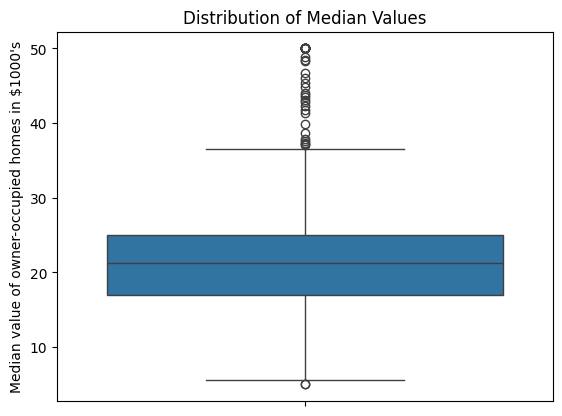

In [8]:
ax_2_1_boxplot = sns.boxplot(y = 'MEDV', data = boston_df).set(
    title = 'Distribution of Median Values',
        ylabel = 'Median value of owner-occupied homes in $1000\'s'
)

**Conclusion:** Median values range from ~3,000 USD to ~50,000 USD. Main body of prices is rather low, around a ~21,000 USD median with some outliers and more disperse values for very high prices abouve 40,000 USD. 

## 2.2: Provide a  bar plot for the Charles river variable

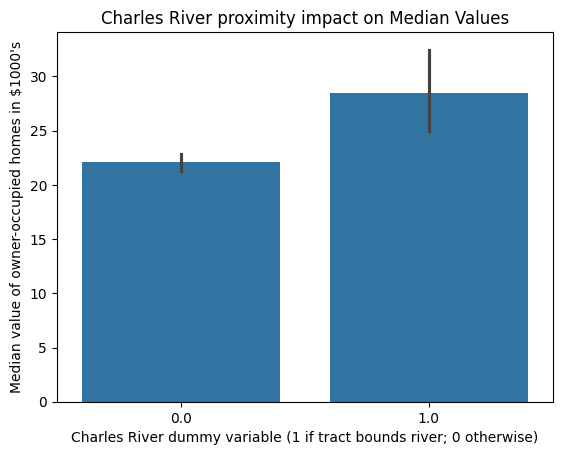

In [9]:
ax_2_2_barplot = sns.barplot(x = 'CHAS', y = 'MEDV', data = boston_df).set(
    title = 'Charles River proximity impact on Median Values',
    xlabel = 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)', 
    ylabel = 'Median value of owner-occupied homes in $1000\'s'
)

**Conclusion:** Being bound by the Charles river seems to have a high impact on median values.

## 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

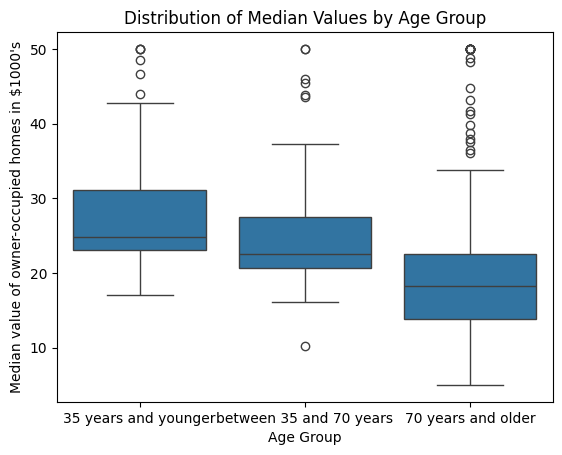

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

ax_2_3_boxplot = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df, order = ['35 years and younger', 'between 35 and 70 years', '70 years and older']).set(
    title = 'Distribution of Median Values by Age Group',
    xlabel = 'Age Group', 
    ylabel = 'Median value of owner-occupied homes in $1000\'s'
)

**Conclusion:** There seems to be a significant impact of age on median values, where younger ages lead to higher median values.

## 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

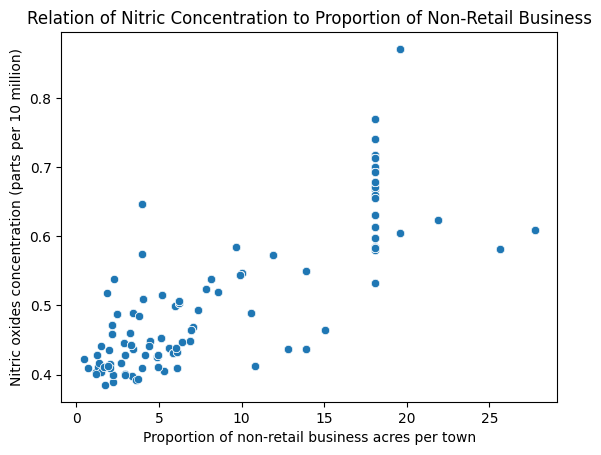

In [11]:
ax_2_4_scatterplot = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df).set(
    title = 'Relation of Nitric Concentration to Proportion of Non-Retail Business',
    xlabel = 'Proportion of non-retail business acres per town', 
    ylabel = 'Nitric oxides concentration (parts per 10 million)'
)

**Conclusion:** There seems to be a positive correlation between Nitric concentration and the proportion of non-retail business acres.

## 2.5 Create a histogram for the pupil to teacher ratio variable

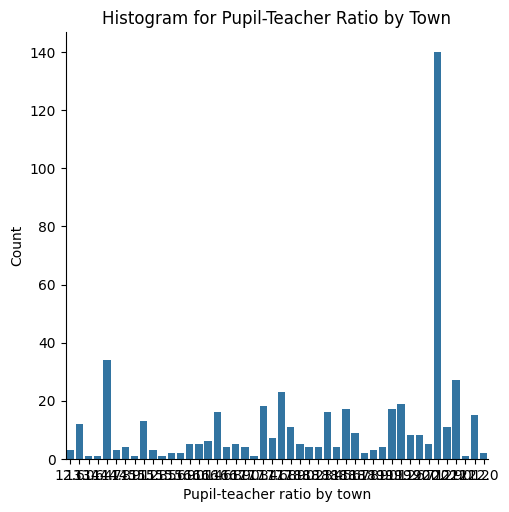

In [12]:
ax_2_5_histogram = sns.catplot(x = 'PTRATIO', kind = 'count', data = boston_df).set(
    title = 'Histogram for Pupil-Teacher Ratio by Town',
    xlabel = 'Pupil-teacher ratio by town',
    ylabel = 'Count'
)

**Conclusion:** Ratio distribution is rather equaly spread except for an outstanding mode at 20.2.

# 3: Generate Descriptive Statistics and Visualizations

## 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis
* $H_0: µ_1 = µ_2$ (the median value means are equal)
* $H_1:$ Being bound by the Charles river has an impact on median values

In [13]:
# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center = 'mean')
# since the p-value is lower than 0.05 we can't assume equality of variance

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in being bound by the Charles river on median values.

## 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three median value means are equal)
* $H_1:$ At least one of the median value means differs

In [14]:
# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center = 'mean')
# since the p-value is higher than 0.05 we can assume equality of variance

f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                                            boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
                                            boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in age on median values.

## 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
* $H_0:$ Nitric oxide concentration is not correlated with non-retail business acres per town
* $H_1:$ Nitric oxide concentration is correlated with non-retail business acres per town

In [15]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241171e-98))

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a correlation between Nitric oxide concentration and non-retail business acres per town.

## 3.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:
* $H_0:$ No impact of distance to the five Boston employment centres on median values
* $H_1:$ Impact of distance to the five Boston employment centres on median values

In [16]:
# Prepare variables
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

# Calculate model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        14:13:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between distance to the five Boston employment centres and median value. Average impact of an additional weighted distance to the five Boston employment centres on the median value is 1091 USD.